In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [58]:
np.random.seed(42)

n = 1000

In [59]:
usia = np.round(np.random.normal(loc=25, scale=5, size=n))
sarjana = usia // 22
magister = usia // 26
doktor = usia // 30
pengalaman = usia // 10
jenis_kelamin = np.random.choice(['Laki-laki', 'Perempuan'], size=n)
jumlah_nilai_40 = np.count_nonzero(usia == 42)

print("Jumlah kemunculan nilai 40 dalam array:", jumlah_nilai_40)

Jumlah kemunculan nilai 40 dalam array: 0


In [60]:
gaji_per_usia = 100000
gaji_sarjana = 1000000
gaji_magister = 2000000
gaji_doktor = 3000000
gaji_per_pengalaman = 3000000

gaji = np.round(usia * gaji_per_usia + sarjana * gaji_sarjana + magister * gaji_magister + doktor * gaji_doktor + pengalaman * gaji_per_pengalaman +np.random.normal(loc=0, scale=0, size=n))

In [61]:
df = pd.DataFrame({
    'Usia': usia,
    'Sarjana': sarjana,
    'Magister': magister,
    'Doktor': doktor,
    'Pengalaman': pengalaman,
    'Jenis Kelamin': jenis_kelamin,
    'Gaji': gaji
})

df.to_csv('Data_Gaji.csv', index=False)

In [62]:
df = pd.read_csv('Data_Gaji.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Usia           1000 non-null   float64
 1   Sarjana        1000 non-null   float64
 2   Magister       1000 non-null   float64
 3   Doktor         1000 non-null   float64
 4   Pengalaman     1000 non-null   float64
 5   Jenis Kelamin  1000 non-null   object 
 6   Gaji           1000 non-null   float64
dtypes: float64(6), object(1)
memory usage: 54.8+ KB


In [63]:
df.head()

,Usia,Sarjana,Magister,Doktor,Pengalaman,Jenis Kelamin,Gaji
0,27.0,1.0,1.0,0.0,2.0,Laki-laki,11700000.0
1,24.0,1.0,0.0,0.0,2.0,Perempuan,9400000.0
2,28.0,1.0,1.0,0.0,2.0,Laki-laki,11800000.0
3,33.0,1.0,1.0,1.0,3.0,Perempuan,18300000.0
4,24.0,1.0,0.0,0.0,2.0,Laki-laki,9400000.0


In [64]:
df = pd.get_dummies(df, columns=['Jenis Kelamin'])
df.head()

,Usia,Sarjana,Magister,Doktor,Pengalaman,Gaji,Jenis Kelamin_Laki-laki,Jenis Kelamin_Perempuan
0,27.0,1.0,1.0,0.0,2.0,11700000.0,True,False
1,24.0,1.0,0.0,0.0,2.0,9400000.0,False,True
2,28.0,1.0,1.0,0.0,2.0,11800000.0,True,False
3,33.0,1.0,1.0,1.0,3.0,18300000.0,False,True
4,24.0,1.0,0.0,0.0,2.0,9400000.0,True,False


In [65]:
x = df[['Usia', 'Sarjana', 'Magister', 'Doktor', 'Pengalaman', 'Jenis Kelamin_Laki-laki', 'Jenis Kelamin_Perempuan']]
y = df[['Gaji']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [66]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [67]:
y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 5.904585123062134e-09
Mean Squared Error (MSE): 4.499872696683838e-17
R-squared (R^2): 1.0


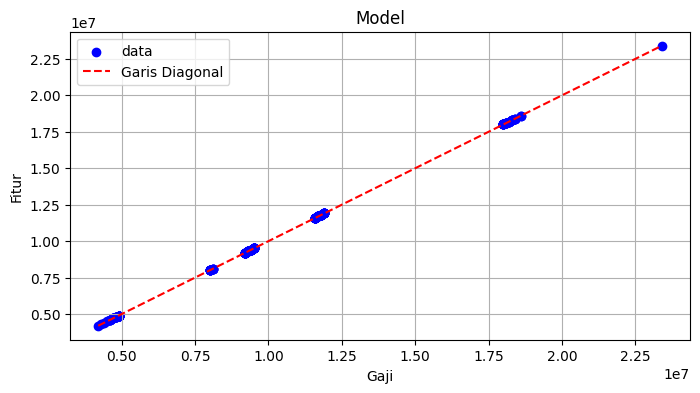

In [68]:
plt.figure(figsize=(8, 4))

plt.scatter(y_test, y_pred, color='blue', label='data')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Garis Diagonal')

plt.title('Model')
plt.xlabel('Gaji')
plt.ylabel('Fitur')
plt.legend()
plt.grid(True)
plt.show()